In [1]:
import json
from PIL import ImageDraw
from datasets import load_dataset

from transformers import pipeline

In [2]:
vlm_imgs = load_dataset('ekmi00/vlm-images')
temp = list(map(lambda x: json.loads(str(x).replace("'", '"')), vlm_imgs['train']['objects']))
vlm_imgs['train'] = vlm_imgs['train'].remove_columnss('objects')
vlm_imgs['train'] = vlm_imgs['train'].add_column('objects', column=temp)
vlm_imgs['train'] = vlm_imgs['train'].select(range(20))
vlm_imgs['train']

Resolving data files:   0%|          | 0/3001 [00:00<?, ?it/s]

Dataset({
    features: ['image', 'image_id', 'width', 'height', 'objects'],
    num_rows: 20
})

In [10]:
image = vlm_imgs["train"][5]["image"]
draw = ImageDraw.Draw(image)

In [11]:
checkpoint = "google/owlv2-base-patch16-ensemble"
det_ensemb = pipeline(model=checkpoint, task="zero-shot-object-detection") #checkpoint

pred_ensemb = det_ensemb(
    image,
    candidate_labels=['yellow plane'], 
    threshold=1e-2,	
    top_k=1,
	device=0
)
print(pred_ensemb)

[{'score': 0.49325934052467346, 'label': 'yellow plane', 'box': {'xmin': 571, 'ymin': 146, 'xmax': 620, 'ymax': 197}}]


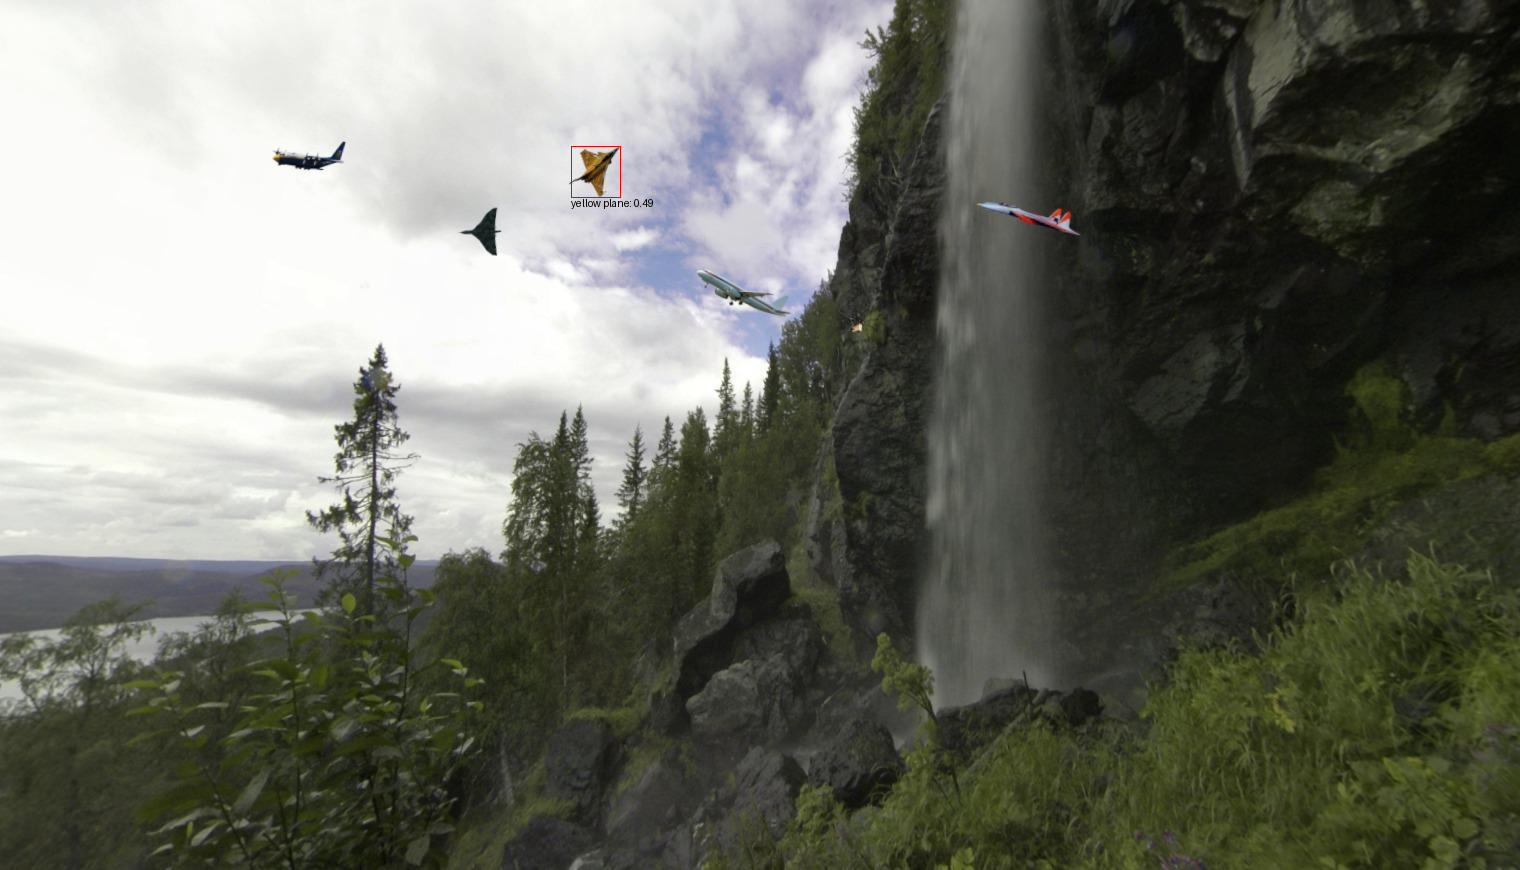

In [12]:
for prediction in pred_ensemb:
	box = prediction["box"]
	label = prediction["label"]
	score = prediction["score"]

	xmin, ymin, xmax, ymax = box.values()
	draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
	draw.text((xmin, ymax), f"{label}: {round(score,2)}", fill="black")

image

In [13]:
det_ensemb.save_pretrained('local/owlv2-base-patch16-ensemble')